### Observing the Dataset

In [29]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [3]:
# ---------------
# Task 1: Drop nan values.
# ---------------

# Read the csv data as a DataFrame
df = pd.read_csv('./telescope_data.csv', index_col=0)

# Remove null and na values
df.dropna()

# Print the DataFrame head
print('Task 1:')
df.head()


Task 1:


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
# ---------------
# Task 2: Extract class column.
# ---------------
# Extract the class classes
classes = df['class']
data_matrix = df.drop(columns='class')

print('Task 2:')
data_matrix.head()

Task 2:


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


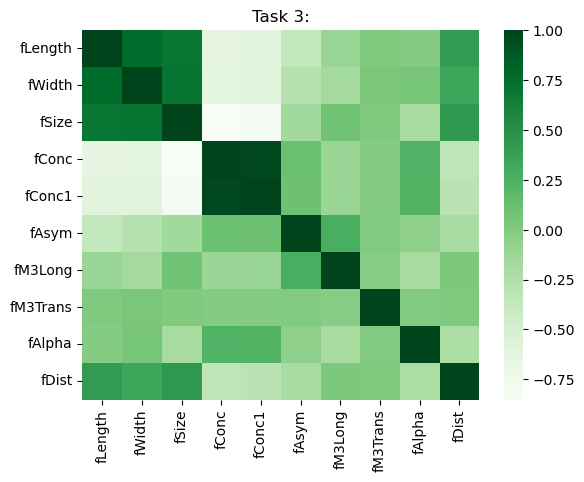

In [7]:
# ---------------
# Task 3: Create a correlation matrix.
# ---------------
# Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Task 3:')
plt.show()

In [15]:
# ---------------
# Task 4: Perform eigendecomposition.
# ---------------
print('Task 4:')

# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, \
      \nOriginal Number of Features: {data_matrix.shape[1]}')

# Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`,
# and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

Task 4:
Eigenvalues length: 10,       
Original Number of Features: 10
(10,) (10, 10)


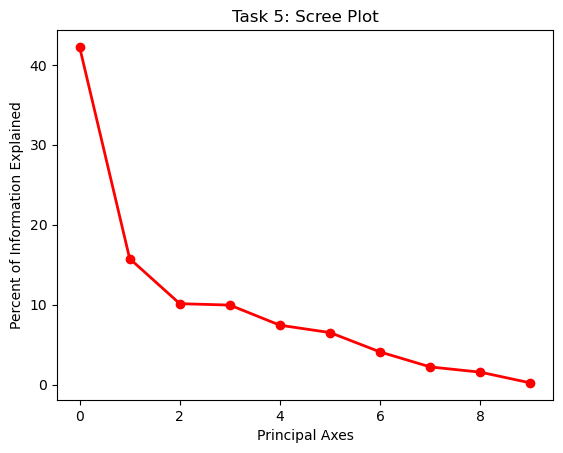

In [16]:
# ---------------
# Task 5: Find the variance/information percentages for each eigenvalue.
# ---------------
# Find the percentages of information for each eigenvector, 
# which is generated by the proportion of its eigenvalues to the sum 
# of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Task 5: Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

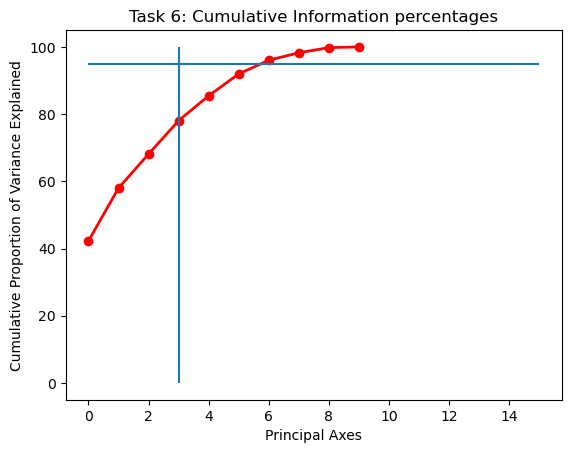

In [17]:
# ---------------
# Task 6: Find the cumulative variance/information percentages for each eigenvalue.
# ---------------
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line 
# for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

### Performing PCA

In [18]:
# ---------------
# Task 7: Calculate the standardized data matrix.
# ---------------
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [20]:
# ---------------
# Task 8: Perform PCA by fitting and transforming the data matrix.
# ---------------
# Find the principal components
pca = PCA()

# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')

Number of features in the data matrix: 10
Number of features in the principal components: 10


In [24]:
# ---------------
# Task 9: Calculate the eigenvalues from the singular values and extract the eigenvectors.
# ---------------
# Find the eigenvalues from the singular values
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2

# Eigenvectors are in the property `.components_` as row vectors. 
# To turn them into column vectors, transpose them using the NumPy method `.T`.
eigenvectors = pca.components_.transpose()

In [25]:
# ---------------
# Task 10: Extract the variance ratios, which are equivalent to the eigenvalue 
# proportions we calculated earlier.
# ---------------
# Get the variance ratios from the `explained_variance_ratio_`
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100

In [26]:
# ---------------
# Task 11: Perform PCA once again but with 2 components
# ---------------
# Calculating principal components with 2 components
# Initialize a PCA object with 2 components
pca = PCA(n_components=2) 
 
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
 
# Print the DataFrame
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')

Number of Principal Components Features: 2
Number of Original Data Features: 10


c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


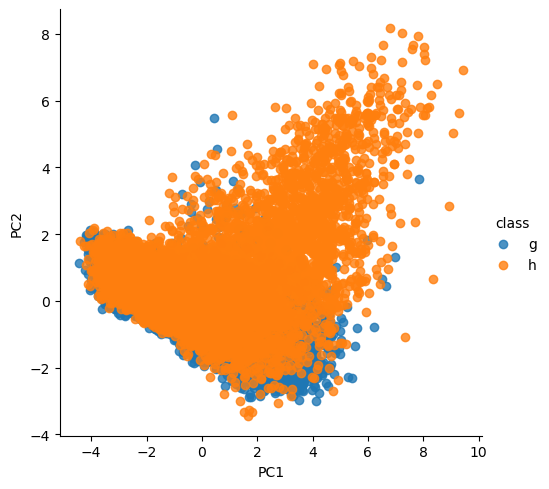

In [27]:
# ---------------
# Task 12: Plot the principal components and have its class as its hue to see 
# if clustering of any kind has occured.
# ---------------
# Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()


# We will use the one-hot-encoded classes as the y
y = classes.astype('category').cat.codes

In [30]:
# ---------------
# Task 13: Fit the transformed features onto the classifier and generate a score.
# ---------------
# Get principal components with 2 features 
# Perform PCA using 2 components
pca_1 = PCA(n_components=2) 
 
# Use the principal components as X and split the data into 33% testing and 
# the rest training
X = pca_1.fit_transform(data_matrix_standardized) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')

c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score for model with 2 PCA features: 0.7417556157400031


c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
# ---------------
# Task 14: Now, fit the classifier with the first two feture of the original 
# data matrix and generate a score. Notice the large difference in scores!
# ---------------
# Using the original features 
# Select two features from the original data
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]
 
# Split the data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, 
                                                    random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with 2 original features: {score_2}')

c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score for model with 2 original features: 0.7192926557272582


c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
